In [77]:

import plot_utils
from plot_utils import LogFile,LogFileType,Fig,Roller
import rolling_funcs

WINDOW_SECS=1.0

In [78]:

response_rollers = [
    Roller("OK rate", rolling_funcs.count_ok, rate=True),
    Roller("ERR rate", rolling_funcs.count_err, rate=True, kwargs={'linestyle':'--'}),
]
mean_roller = Roller('mean', rolling_funcs.mean)
packet_rate = Roller('rate', rolling_funcs.count_kleene_packets, rate=True)

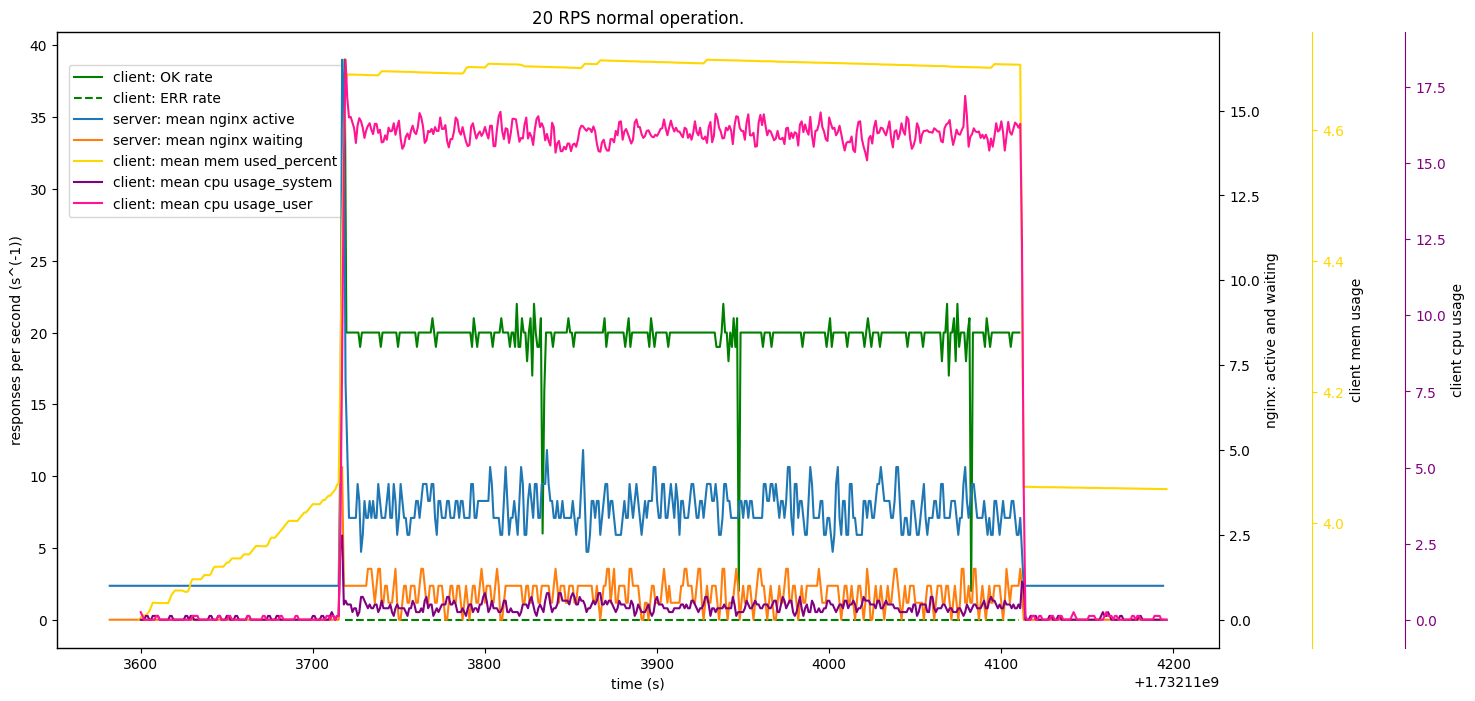

In [79]:
HILBERT="./logs/hilbert/2024-11-20_14:50:09.json"
KLEENE="./logs/kleene/2024-11-20_14-41-57.481527.txt"
KLEENE_TELEGRAF="./logs/kleene/2024-11-20_14:50:09.json"

fig,ax = plot_utils.fig([Fig(title='20 RPS normal operation.',x='time (s)',y='responses per second (s^(-1))')])
# ax.set_xlim(3800+1.73211e9,4000+1.73211e9)

nginx_active = LogFile(log_type=LogFileType.TELEGRAF, path=HILBERT,
kwargs={'telegraf': {
    'nginx' : ['active', 'waiting']
}
})
nginx_writing = LogFile(log_type=LogFileType.TELEGRAF, path=HILBERT,
kwargs={'telegraf': {
    'nginx' : ['writing']
}, 'color':'gold'
})

client_cpu = LogFile(log_type=LogFileType.TELEGRAF, path=KLEENE_TELEGRAF,
kwargs={'telegraf':{
    'cpu' : [{'usage_system':{'color':'purple'}},{'usage_user':{'color':'deeppink'}},]
}})

client_mem = LogFile(log_type=LogFileType.TELEGRAF, path=KLEENE_TELEGRAF,
kwargs={'telegraf':{
    # 'mem' : ['used_percent','buffered','cached','vmalloc_used']
    'mem' : [{'used_percent':{'color':'gold'}}]
}})

client_log = LogFile(log_type=LogFileType.GOT, path=KLEENE,kwargs={'color':'g'})

ax_active,ax_mem,ax_cpu = plot_utils.add_y_axes(
    ax, [('nginx: active and waiting','black'),('client mem usage','gold'),('client cpu usage','purple')]
)

plot_utils.overlay_rolling(ax_active, {'server': nginx_active}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax_mem, {'client': client_mem}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax_cpu, {'client': client_cpu}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax, {'client': client_log}, response_rollers, WINDOW_SECS, const_stride_secs=1.0, times_units='s')

plot_utils.show_combined_legends([ax,ax_active,ax_mem,ax_cpu], loc=[0.01,0.7])
fig.savefig('./plots/20RPS.png')

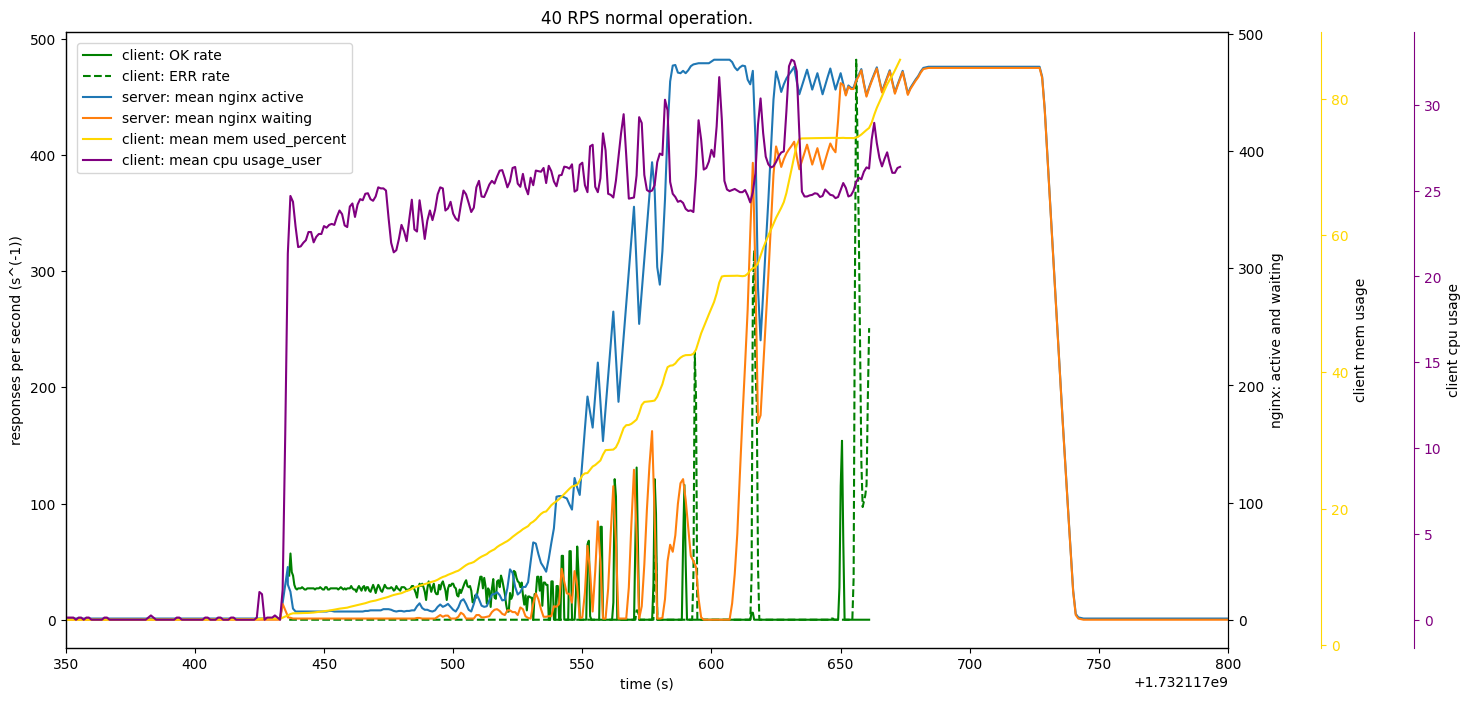

In [80]:
HILBERT="./logs/hilbert/2024-11-20_15:59:48.json"
KLEENE="./logs/kleene/2024-11-20_15-43-56.023522.txt"
KLEENE_TELEGRAF="./logs/kleene/2024-11-20_15:59:48.json"

fig,ax = plot_utils.fig([Fig(title='40 RPS normal operation.',x='time (s)',y='responses per second (s^(-1))')])
ax.set_xlim(left=7350+1.73211e9,right=7800+1.73211e9)

nginx_active = LogFile(log_type=LogFileType.TELEGRAF, path=HILBERT,
kwargs={'telegraf': {
    'nginx' : ['active', 'waiting']
}
})
nginx_writing = LogFile(log_type=LogFileType.TELEGRAF, path=HILBERT,
kwargs={'telegraf': {
    'nginx' : ['writing']
}, 'color':'gold'
})

client_cpu = LogFile(log_type=LogFileType.TELEGRAF, path=KLEENE_TELEGRAF,
kwargs={'telegraf':{
    'cpu' : [{'usage_user':{'color':'purple'}},]
}})

client_mem = LogFile(log_type=LogFileType.TELEGRAF, path=KLEENE_TELEGRAF,
kwargs={'telegraf':{
    # 'mem' : ['used_percent','buffered','cached','vmalloc_used']
    'mem' : [{'used_percent':{'color':'gold'}}]
}})

client_log = LogFile(log_type=LogFileType.GOT, path=KLEENE,kwargs={'color':'g'})

ax_active,ax_mem,ax_cpu = plot_utils.add_y_axes(
    ax, [('nginx: active and waiting','black'),('client mem usage','gold'),('client cpu usage','purple')]
)

plot_utils.overlay_rolling(ax_active, {'server': nginx_active}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax_mem, {'client': client_mem}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax_cpu, {'client': client_cpu}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax, {'client': client_log}, response_rollers, WINDOW_SECS, const_stride_secs=0.5, times_units='s')

plot_utils.show_combined_legends([ax,ax_active,ax_mem,ax_cpu], loc=[0.01,0.77])
fig.savefig('./plots/40RPS.png')

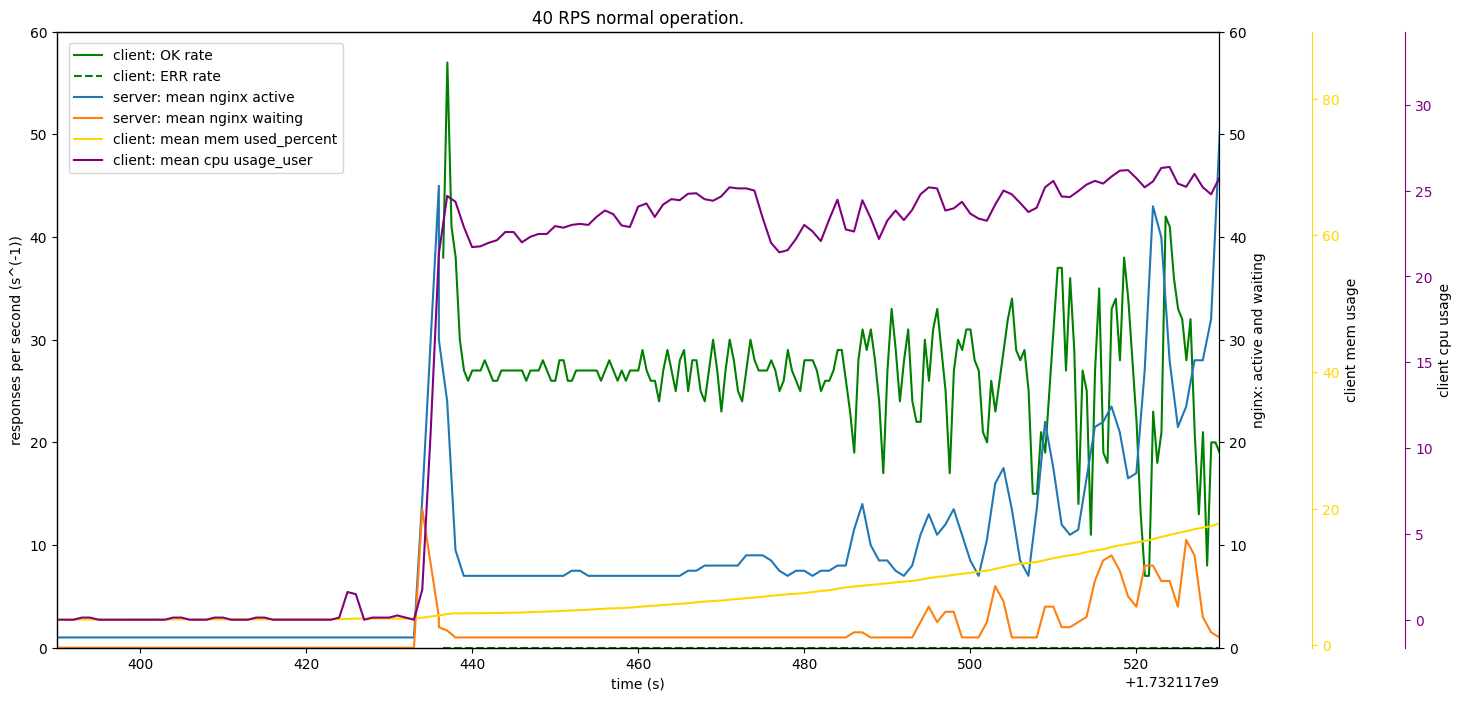

In [81]:

HILBERT="./logs/hilbert/2024-11-20_15:59:48.json"
KLEENE="./logs/kleene/2024-11-20_15-43-56.023522.txt"
KLEENE_TELEGRAF="./logs/kleene/2024-11-20_15:59:48.json"

fig,ax = plot_utils.fig([Fig(title='40 RPS normal operation.',x='time (s)',y='responses per second (s^(-1))')])

nginx_active = LogFile(log_type=LogFileType.TELEGRAF, path=HILBERT,
kwargs={'telegraf': {
    'nginx' : ['active', 'waiting']
}
})
nginx_writing = LogFile(log_type=LogFileType.TELEGRAF, path=HILBERT,
kwargs={'telegraf': {
    'nginx' : ['writing']
}, 'color':'gold'
})

client_cpu = LogFile(log_type=LogFileType.TELEGRAF, path=KLEENE_TELEGRAF,
kwargs={'telegraf':{
    'cpu' : [{'usage_user':{'color':'purple'}},]
}})

client_mem = LogFile(log_type=LogFileType.TELEGRAF, path=KLEENE_TELEGRAF,
kwargs={'telegraf':{
    # 'mem' : ['used_percent','buffered','cached','vmalloc_used']
    'mem' : [{'used_percent':{'color':'gold'}}]
}})

client_log = LogFile(log_type=LogFileType.GOT, path=KLEENE,kwargs={'color':'g'})

ax_active,ax_mem,ax_cpu = plot_utils.add_y_axes(
    ax, [('nginx: active and waiting','black'),('client mem usage','gold'),('client cpu usage','purple')]
)

ax.set_xlim(left=7390+1.73211e9,right=7530+1.73211e9)
ax.set_ylim(0,60)
ax_active.set_ylim(0,60)

plot_utils.overlay_rolling(ax_active, {'server': nginx_active}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax_mem, {'client': client_mem}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax_cpu, {'client': client_cpu}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax, {'client': client_log}, response_rollers, WINDOW_SECS, const_stride_secs=0.5, times_units='s')

plot_utils.show_combined_legends([ax,ax_active,ax_mem,ax_cpu], loc=[0.01,0.77])
fig.savefig('./plots/40RPS_zoom.png')

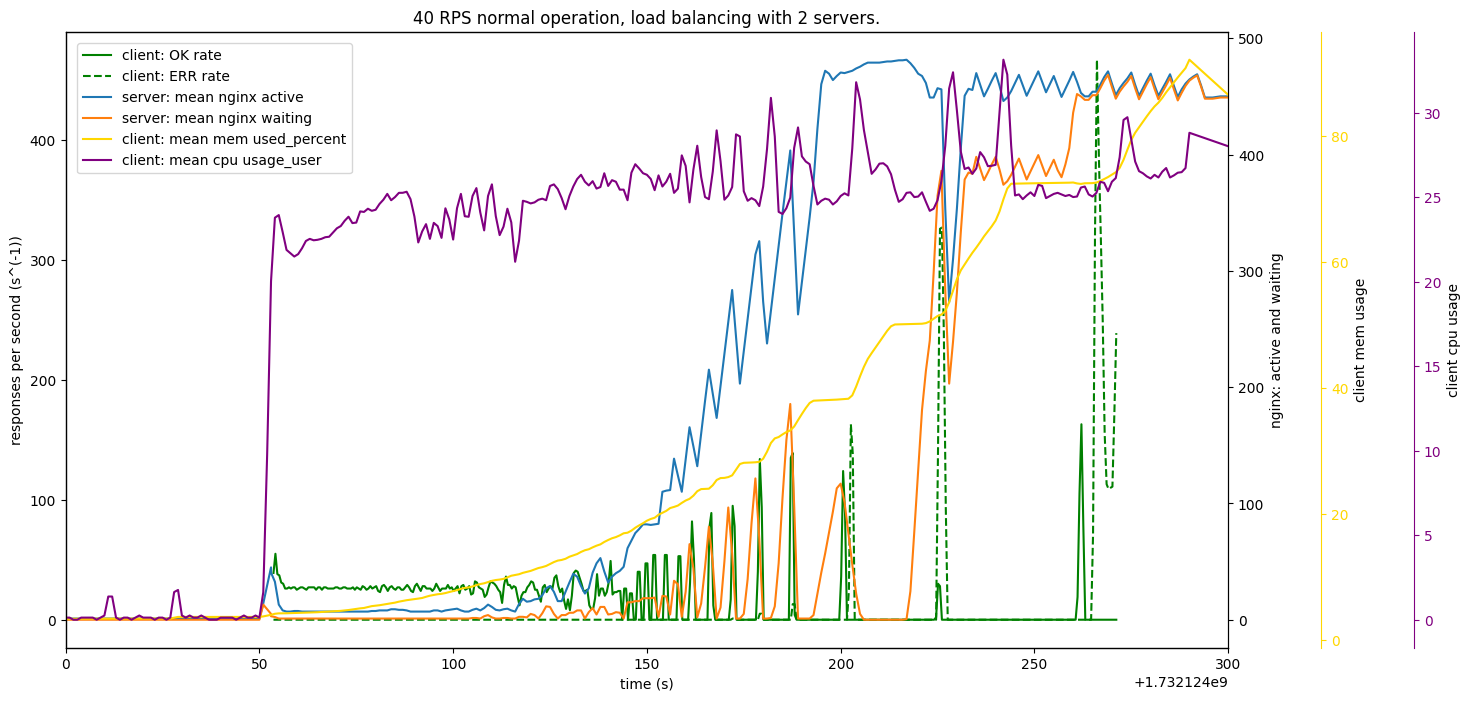

In [82]:
HILBERT="./logs/hilbert/2024-11-20_17:47:54.json"
KLEENE="./logs/kleene/2024-11-20_17-34-13.131839.txt"
KLEENE_TELEGRAF="./logs/kleene/2024-11-20_17:47:54.json"

fig,ax = plot_utils.fig([Fig(title='40 RPS normal operation, load balancing with 2 servers.',x='time (s)',y='responses per second (s^(-1))')])
ax.set_xlim(left=0+1.732124e9,right=300+1.732124e9)

nginx_active = LogFile(log_type=LogFileType.TELEGRAF, path=HILBERT,
kwargs={'telegraf': {
    'nginx' : ['active', 'waiting']
}
})
nginx_writing = LogFile(log_type=LogFileType.TELEGRAF, path=HILBERT,
kwargs={'telegraf': {
    'nginx' : ['writing']
}, 'color':'gold'
})

client_cpu = LogFile(log_type=LogFileType.TELEGRAF, path=KLEENE_TELEGRAF,
kwargs={'telegraf':{
    'cpu' : [{'usage_user':{'color':'purple'}},]
}})

client_mem = LogFile(log_type=LogFileType.TELEGRAF, path=KLEENE_TELEGRAF,
kwargs={'telegraf':{
    # 'mem' : ['used_percent','buffered','cached','vmalloc_used']
    'mem' : [{'used_percent':{'color':'gold'}}]
}})

client_log = LogFile(log_type=LogFileType.GOT, path=KLEENE,kwargs={'color':'g'})

ax_active,ax_mem,ax_cpu = plot_utils.add_y_axes(
    ax, [('nginx: active and waiting','black'),('client mem usage','gold'),('client cpu usage','purple')]
)

plot_utils.overlay_rolling(ax_active, {'server': nginx_active}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax_mem, {'client': client_mem}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax_cpu, {'client': client_cpu}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax, {'client': client_log}, response_rollers, WINDOW_SECS, const_stride_secs=0.5, times_units='s')

plot_utils.show_combined_legends([ax,ax_active,ax_mem,ax_cpu], loc=[0.01,0.77])
fig.savefig('./plots/40RPS_load_balancing.png')

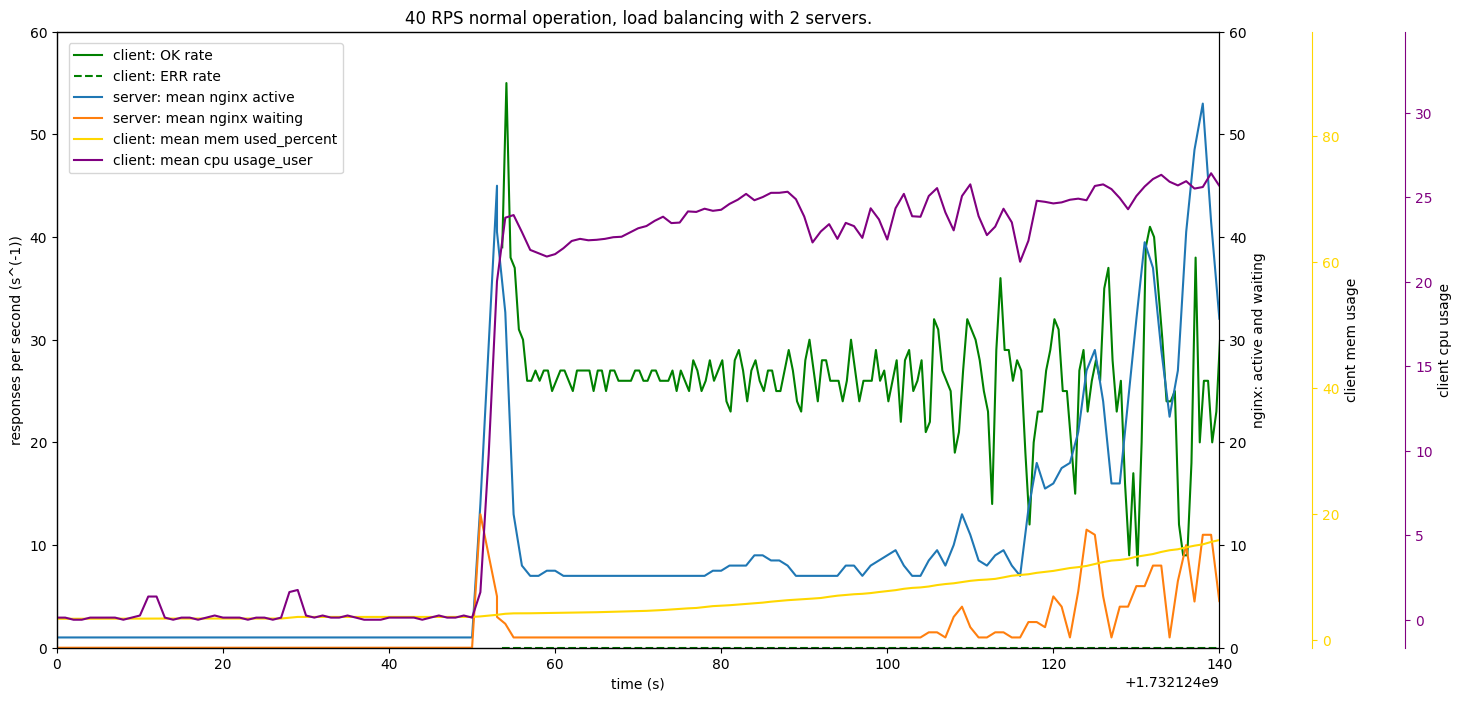

In [83]:
HILBERT="./logs/hilbert/2024-11-20_17:47:54.json"
KLEENE="./logs/kleene/2024-11-20_17-34-13.131839.txt"
KLEENE_TELEGRAF="./logs/kleene/2024-11-20_17:47:54.json"

fig,ax = plot_utils.fig([Fig(title='40 RPS normal operation, load balancing with 2 servers.',x='time (s)',y='responses per second (s^(-1))')])
ax.set_xlim(left=0+1.732124e9,right=140+1.732124e9)
ax.set_ylim(0,60)

nginx_active = LogFile(log_type=LogFileType.TELEGRAF, path=HILBERT,
kwargs={'telegraf': {
    'nginx' : ['active', 'waiting']
}
})
nginx_writing = LogFile(log_type=LogFileType.TELEGRAF, path=HILBERT,
kwargs={'telegraf': {
    'nginx' : ['writing']
}, 'color':'gold'
})

client_cpu = LogFile(log_type=LogFileType.TELEGRAF, path=KLEENE_TELEGRAF,
kwargs={'telegraf':{
    'cpu' : [{'usage_user':{'color':'purple'}},]
}})

client_mem = LogFile(log_type=LogFileType.TELEGRAF, path=KLEENE_TELEGRAF,
kwargs={'telegraf':{
    # 'mem' : ['used_percent','buffered','cached','vmalloc_used']
    'mem' : [{'used_percent':{'color':'gold'}}]
}})

client_log = LogFile(log_type=LogFileType.GOT, path=KLEENE,kwargs={'color':'g'})

ax_active,ax_mem,ax_cpu = plot_utils.add_y_axes(
    ax, [('nginx: active and waiting','black'),('client mem usage','gold'),('client cpu usage','purple')]
)

ax_active.set_ylim(0,60)

plot_utils.overlay_rolling(ax_active, {'server': nginx_active}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax_mem, {'client': client_mem}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax_cpu, {'client': client_cpu}, [mean_roller],WINDOW_SECS,times_units='s')
plot_utils.overlay_rolling(ax, {'client': client_log}, response_rollers, WINDOW_SECS, const_stride_secs=0.5, times_units='s')

plot_utils.show_combined_legends([ax,ax_active,ax_mem,ax_cpu], loc=[0.01,0.77])
fig.savefig('./plots/40RPS_load_balancing_zoom.png')